In [7]:
import numpy as np
import pandas as pd 

**What we will do first**
- let say we have X matrix with columns as features and Y vector
- Y contains classes like a1, a2, a3....
- We will create a dictionary to implement naive bayes formula for classes
- dictionary will contain ai i.e classes as key within this class we will store for each of the feature, what are all possible values that feature can take then storing their count i.e how many data in your feature belongs to this class.

$[a_{1}]\rightarrow [j]\rightarrow [x^{j}_{1}]...[x^{j}_{k}]\rightarrow count$

In [2]:
def fit(X_train, Y_train):
    result = {}
    class_values = set(Y_train) # to get number of classes
    for current_class in class_values:
        result[current_class] = {}
        result["total_data"] = len(Y_train)
        current_class_rows = (Y_train == current_class)
        X_train_current = X_train[current_class_rows]
        Y_train_current = Y_train[current_class_rows]
        num_features = X_train.shape[1] # no. of features
        result[current_class]["total_count"] = len(Y_train_current)
        for j in range(1, num_features + 1):
            j_1 = j- 1
            result[current_class][j] = {}
            all_possible_values = set(X_train[:, j-1]) # set filters unqiue elements
            for current_value in all_possible_values:
                result[current_class][j][current_value] = (X_train_current[:, j - 1] == current_value).sum()
                
    return result

In [3]:
# num_features = 5
# for j in range(num_features):
#     print(j)
# print(end="\n")
# for j in range(1,num_features+1):
#     print(j)

In [4]:
def predictSinglePoint(dictionary, x):
    classes = dictionary.keys()
    beat_P = -1000
    best_class = -1
    first_run = True
    for current_class in classes:
        if(current_class == "total_data"):
            continue
        p_current_class = probability(dictionary,x,current_class)
        if(first_run or p_current_class > best_p):
            best_p = p_current_class
            best_class = current_class
        first_run = False
    return best_class

In [9]:
def probability(dictionary, x, current_class):
    output = np.log(dictionary[current_class]["total_count"])- np.log(dictionary['total_data'])
    num_features = len(dictionary[current_class].keys())-1
    for j in range(1, num_features+1):
        xj = x[j-1]
        count_current_class_with_value_xj = dictionary[current_class][j][xj] + 1 # laplace correction
        count_current_class = dictionary[current_class]['total_count'] + len(dictionary[current_class][j].keys()) #laplace correction deno
        current_xj_probability = np.log(count_current_class_with_value_xj)-np.log(count_current_class)
        output = output + current_xj_probability
        """
        p'() + pi p() will give very large value
        to fix it we will take log of both the terms and will add them
        then it will become like:
        log p' + log p1 + log p2 ....
        
        """
    return output

In [10]:
def predict(dictionary, X_test):
    y_pred = []
    for x in X_test:
        x_class = predictSinglePoint(dictionary,x)
        y_pred.append(x_class)
    return y_pred

In [11]:
"""
iris dataset will be having continous data likes 1.32, 1.21..
we want it to be a labelled data, to do it pick the mean of all 
possible value as point and then mean/2 and mean/3 as another points other point 
and we will label them.
"""
def makeLabelled(column):
    second_limit = column.mean()
    first_limit = 0.5 * second_limit
    third_limit = 1.5 * second_limit
    for i in range(0, len(column)):
        if(column[i]<first_limit):
            column[i] = 0
        elif(column[i]<second_limit):
            column[i] = 1
        elif(column[i]<third_limit):
            column[i] = 2
        else:
            column[i] = 3
    return column

In [12]:
from sklearn import datasets
iris=datasets.load_iris()
X = iris.data
Y = iris.target

In [13]:
for i in range(0, X.shape[-1]):
    X[:,i] = makeLabelled(X[:,i])

In [15]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size = 0.25, random_state=4)


In [16]:
dictionary =  fit(X_train,Y_train)

In [17]:
Y_pred = predict(dictionary,X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.96      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

[[18  0  0]
 [ 0  8  0]
 [ 0  1 11]]


## How to deal with continous datasets
- We assumes that dataset follows the gaussian curve
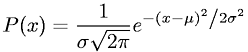

In [24]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.73      1.00      0.84         8
           2       1.00      0.75      0.86        12

    accuracy                           0.92        38
   macro avg       0.91      0.92      0.90        38
weighted avg       0.94      0.92      0.92        38

[[18  0  0]
 [ 0  8  0]
 [ 0  3  9]]
